In [62]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Data Exploration/Preparation

In [63]:
# Read and show data
df = pd.read_csv('spotify_liked_genres.csv')
df.head(10)

,track_name,artist_name,artist_id,album_name,release_date,length,popularity,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,genres
0,Miss The Days,SBTRKT,1O10apSOoAPjOu6UhUNmeI,Miss The Days,2022,220650,0,4TdBkfjotcNZWAGI2xgxh9,0.14800,0.522,0.934,0.517000,1,0.0447,-3.334,0,0.0631,175.293,4,"['alternative dance', 'electronica', 'electrop..."
1,Turning You On,Never Dull,2u3rmzZC0psTER2sDfUebm,"VA Compilation, Vol. 2",2018,405245,0,0CgQOzaA7J99vQpdjIcaLS,0.00911,0.794,0.784,0.713000,4,0.0892,-8.079,0,0.0802,120.014,4,"['disco house', 'funky house']"
2,Otis,JAY-Z,3nFkdlSjzX9mRTtwJOzDYB,Watch The Throne (Deluxe),2011,178213,72,6vegnfDS8DAEaCqWaPYGPy,0.55200,0.754,0.631,0.000000,7,0.5000,-4.751,0,0.3070,94.577,4,"['east coast hip hop', 'hip hop', 'rap']"
3,Matilda,Harry Styles,6KImCVD70vtIoJWnq6nGn3,Harry's House,2022,245964,83,6uvh0In7u1Xn4HgxOfAn8O,0.89600,0.507,0.294,0.000020,2,0.0966,-10.000,1,0.0400,114.199,4,['pop']
4,Quarterback,Wallows,0NIPkIjTV8mB795yEIiPYL,Quarterback,2021,180386,63,2OwIGCjx7e7J1HHdAqIv21,0.01350,0.689,0.719,0.000002,11,0.1070,-3.883,1,0.0310,121.008,4,"['indie pop', 'modern rock', 'pop']"
5,Cinema,Harry Styles,6KImCVD70vtIoJWnq6nGn3,Harry's House,2022,243507,77,35TyJIMR3xRouUuo2sjS6v,0.35400,0.829,0.644,0.051100,9,0.0944,-7.696,0,0.0427,105.993,4,['pop']
6,Droppin Jewels,Young Thug,50co4Is1HCEo8bhOyUWKpn,Punk,2021,218596,54,3q8Uyfo98yoEqByamJOIkJ,0.48900,0.575,0.523,0.000000,2,0.0873,-10.002,0,0.5060,78.252,4,"['atl hip hop', 'atl trap', 'gangster rap', 'h..."
7,United In Grief,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,Mr. Morale & The Big Steppers,2022,255377,4,05zd5Nv0e02ZqrlC8A2cwx,0.24400,0.529,0.845,0.000000,8,0.1430,-8.142,1,0.4040,85.630,3,"['conscious hip hop', 'hip hop', 'rap', 'west ..."
8,We Cry Together,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,Mr. Morale & The Big Steppers,2022,341307,2,0RAvy97QRPzO2AfK5Dw6j3,0.29200,0.648,0.680,0.000000,11,0.0808,-7.276,1,0.3450,106.890,3,"['conscious hip hop', 'hip hop', 'rap', 'west ..."
9,Savior,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,Mr. Morale & The Big Steppers,2022,224466,8,0YeUVm23SAkUruwEx9LWnt,0.49500,0.605,0.692,0.000000,8,0.3030,-7.450,1,0.4460,124.840,5,"['conscious hip hop', 'hip hop', 'rap', 'west ..."


In [64]:
# Drop the messy id 
df = df.drop(['artist_id', 'id'], axis=1)
df.head(10)

,track_name,artist_name,album_name,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,genres
0,Miss The Days,SBTRKT,Miss The Days,2022,220650,0,0.14800,0.522,0.934,0.517000,1,0.0447,-3.334,0,0.0631,175.293,4,"['alternative dance', 'electronica', 'electrop..."
1,Turning You On,Never Dull,"VA Compilation, Vol. 2",2018,405245,0,0.00911,0.794,0.784,0.713000,4,0.0892,-8.079,0,0.0802,120.014,4,"['disco house', 'funky house']"
2,Otis,JAY-Z,Watch The Throne (Deluxe),2011,178213,72,0.55200,0.754,0.631,0.000000,7,0.5000,-4.751,0,0.3070,94.577,4,"['east coast hip hop', 'hip hop', 'rap']"
3,Matilda,Harry Styles,Harry's House,2022,245964,83,0.89600,0.507,0.294,0.000020,2,0.0966,-10.000,1,0.0400,114.199,4,['pop']
4,Quarterback,Wallows,Quarterback,2021,180386,63,0.01350,0.689,0.719,0.000002,11,0.1070,-3.883,1,0.0310,121.008,4,"['indie pop', 'modern rock', 'pop']"
5,Cinema,Harry Styles,Harry's House,2022,243507,77,0.35400,0.829,0.644,0.051100,9,0.0944,-7.696,0,0.0427,105.993,4,['pop']
6,Droppin Jewels,Young Thug,Punk,2021,218596,54,0.48900,0.575,0.523,0.000000,2,0.0873,-10.002,0,0.5060,78.252,4,"['atl hip hop', 'atl trap', 'gangster rap', 'h..."
7,United In Grief,Kendrick Lamar,Mr. Morale & The Big Steppers,2022,255377,4,0.24400,0.529,0.845,0.000000,8,0.1430,-8.142,1,0.4040,85.630,3,"['conscious hip hop', 'hip hop', 'rap', 'west ..."
8,We Cry Together,Kendrick Lamar,Mr. Morale & The Big Steppers,2022,341307,2,0.29200,0.648,0.680,0.000000,11,0.0808,-7.276,1,0.3450,106.890,3,"['conscious hip hop', 'hip hop', 'rap', 'west ..."
9,Savior,Kendrick Lamar,Mr. Morale & The Big Steppers,2022,224466,8,0.49500,0.605,0.692,0.000000,8,0.3030,-7.450,1,0.4460,124.840,5,"['conscious hip hop', 'hip hop', 'rap', 'west ..."


In [65]:
# Replace it with a unique id with cleaner version

def mapper(col):
    coded_dict = dict()
    cter = 1
    encoded = []
    
    for val in df[col]:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter += 1
        
        encoded.append(coded_dict[val])
    return encoded

song_id = mapper('track_name')
artist_id = mapper('artist_name')
genres_id = mapper('genres')

df['track_id'] = song_id
df['artist_id'] = artist_id
df['genres_id'] = genres_id

df.head(10)

,track_name,artist_name,album_name,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,genres,track_id,artist_id,genres_id
0,Miss The Days,SBTRKT,Miss The Days,2022,220650,0,0.14800,0.522,0.934,0.517000,...,0.0447,-3.334,0,0.0631,175.293,4,"['alternative dance', 'electronica', 'electrop...",1,1,1
1,Turning You On,Never Dull,"VA Compilation, Vol. 2",2018,405245,0,0.00911,0.794,0.784,0.713000,...,0.0892,-8.079,0,0.0802,120.014,4,"['disco house', 'funky house']",2,2,2
2,Otis,JAY-Z,Watch The Throne (Deluxe),2011,178213,72,0.55200,0.754,0.631,0.000000,...,0.5000,-4.751,0,0.3070,94.577,4,"['east coast hip hop', 'hip hop', 'rap']",3,3,3
3,Matilda,Harry Styles,Harry's House,2022,245964,83,0.89600,0.507,0.294,0.000020,...,0.0966,-10.000,1,0.0400,114.199,4,['pop'],4,4,4
4,Quarterback,Wallows,Quarterback,2021,180386,63,0.01350,0.689,0.719,0.000002,...,0.1070,-3.883,1,0.0310,121.008,4,"['indie pop', 'modern rock', 'pop']",5,5,5
5,Cinema,Harry Styles,Harry's House,2022,243507,77,0.35400,0.829,0.644,0.051100,...,0.0944,-7.696,0,0.0427,105.993,4,['pop'],6,4,4
6,Droppin Jewels,Young Thug,Punk,2021,218596,54,0.48900,0.575,0.523,0.000000,...,0.0873,-10.002,0,0.5060,78.252,4,"['atl hip hop', 'atl trap', 'gangster rap', 'h...",7,6,6
7,United In Grief,Kendrick Lamar,Mr. Morale & The Big Steppers,2022,255377,4,0.24400,0.529,0.845,0.000000,...,0.1430,-8.142,1,0.4040,85.630,3,"['conscious hip hop', 'hip hop', 'rap', 'west ...",8,7,7
8,We Cry Together,Kendrick Lamar,Mr. Morale & The Big Steppers,2022,341307,2,0.29200,0.648,0.680,0.000000,...,0.0808,-7.276,1,0.3450,106.890,3,"['conscious hip hop', 'hip hop', 'rap', 'west ...",9,7,7
9,Savior,Kendrick Lamar,Mr. Morale & The Big Steppers,2022,224466,8,0.49500,0.605,0.692,0.000000,...,0.3030,-7.450,1,0.4460,124.840,5,"['conscious hip hop', 'hip hop', 'rap', 'west ...",10,7,7


In [66]:
# Move column to desire column for easy access

column_to_move = df.pop('artist_id')
column_to_move2 = df.pop('track_id')
column_to_move3 = df.pop('genres')
column_to_move4 = df.pop('genres_id')


df.insert(2, "artist_id", column_to_move)
df.insert(1, "track_id", column_to_move2)
df.insert(6, "genres", column_to_move3)
df.insert(7, "genres_id", column_to_move4)

df.head()

,track_name,track_id,artist_name,artist_id,album_name,release_date,genres,genres_id,length,popularity,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,Miss The Days,1,SBTRKT,1,Miss The Days,2022,"['alternative dance', 'electronica', 'electrop...",1,220650,0,...,0.522,0.934,0.517000,1,0.0447,-3.334,0,0.0631,175.293,4
1,Turning You On,2,Never Dull,2,"VA Compilation, Vol. 2",2018,"['disco house', 'funky house']",2,405245,0,...,0.794,0.784,0.713000,4,0.0892,-8.079,0,0.0802,120.014,4
2,Otis,3,JAY-Z,3,Watch The Throne (Deluxe),2011,"['east coast hip hop', 'hip hop', 'rap']",3,178213,72,...,0.754,0.631,0.000000,7,0.5000,-4.751,0,0.3070,94.577,4
3,Matilda,4,Harry Styles,4,Harry's House,2022,['pop'],4,245964,83,...,0.507,0.294,0.000020,2,0.0966,-10.000,1,0.0400,114.199,4
4,Quarterback,5,Wallows,5,Quarterback,2021,"['indie pop', 'modern rock', 'pop']",5,180386,63,...,0.689,0.719,0.000002,11,0.1070,-3.883,1,0.0310,121.008,4


In [67]:
# Check columns and rows

df.shape

(4394, 21)

In [68]:
# Check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        4366 non-null   object 
 1   track_id          4394 non-null   int64  
 2   artist_name       4366 non-null   object 
 3   artist_id         4394 non-null   int64  
 4   album_name        4366 non-null   object 
 5   release_date      4394 non-null   int64  
 6   genres            4394 non-null   object 
 7   genres_id         4394 non-null   int64  
 8   length            4394 non-null   int64  
 9   popularity        4394 non-null   int64  
 10  acousticness      4394 non-null   float64
 11  danceability      4394 non-null   float64
 12  energy            4394 non-null   float64
 13  instrumentalness  4394 non-null   float64
 14  key               4394 non-null   int64  
 15  liveness          4394 non-null   float64
 16  loudness          4394 non-null   float64


In [69]:
# Check for missing values in columns

(df.isnull().sum()/len(df)*100).sort_values(ascending= False)

track_name          0.637233
artist_name         0.637233
album_name          0.637233
energy              0.000000
tempo               0.000000
speechiness         0.000000
mode                0.000000
loudness            0.000000
liveness            0.000000
key                 0.000000
instrumentalness    0.000000
acousticness        0.000000
danceability        0.000000
track_id            0.000000
popularity          0.000000
length              0.000000
genres_id           0.000000
genres              0.000000
release_date        0.000000
artist_id           0.000000
time_signature      0.000000
dtype: float64

In [70]:
# Drop the missing value, because the track name is not there
df = df.dropna()

In [71]:
# Check for missing values in columns again

(df.isnull().sum()/len(df)*100).sort_values(ascending= False)

track_name          0.0
danceability        0.0
tempo               0.0
speechiness         0.0
mode                0.0
loudness            0.0
liveness            0.0
key                 0.0
instrumentalness    0.0
energy              0.0
acousticness        0.0
track_id            0.0
popularity          0.0
length              0.0
genres_id           0.0
genres              0.0
release_date        0.0
album_name          0.0
artist_id           0.0
artist_name         0.0
time_signature      0.0
dtype: float64

In [72]:
# Duplicate check

duplicate = df.copy()
duplicate.drop_duplicates(subset= None, inplace= True)
duplicate.shape

(4365, 21)

In [73]:
df.describe()

,track_id,artist_id,release_date,genres_id,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
count,4366.000000,4366.000000,4366.000000,4366.000000,4.366000e+03,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000
mean,2103.930829,929.779890,2009.882959,632.473431,2.502444e+05,22.956482,0.311452,0.591439,0.587425,0.233864,5.265460,0.202673,-9.438582,0.584059,0.119747,118.669767,3.916858
std,1232.538231,559.484091,13.402682,442.190061,1.426524e+05,24.547561,0.315608,0.183153,0.230331,0.342671,3.650647,0.170164,4.774190,0.492940,0.134918,30.055693,0.438371
min,1.000000,1.000000,1937.000000,1.000000,9.680000e+03,0.000000,0.000001,0.000000,0.000024,0.000000,0.000000,0.018500,-39.524000,0.000000,0.000000,0.000000,0.000000
25%,1030.250000,442.250000,2007.000000,232.000000,1.811638e+05,0.000000,0.032000,0.467000,0.435000,0.000008,2.000000,0.098700,-11.107500,0.000000,0.037600,94.928500,4.000000
50%,2090.500000,927.000000,2016.000000,588.500000,2.267265e+05,14.000000,0.191000,0.607000,0.604000,0.005210,5.000000,0.127000,-8.410000,1.000000,0.057200,118.955000,4.000000
75%,3173.750000,1383.750000,2018.000000,1042.000000,2.923465e+05,43.000000,0.545000,0.734000,0.760000,0.505250,9.000000,0.257000,-6.409000,1.000000,0.145750,137.997750,4.000000
max,4255.000000,1889.000000,2022.000000,1404.000000,3.815786e+06,91.000000,0.996000,0.980000,0.999000,0.993000,11.000000,0.982000,1.342000,1.000000,0.946000,244.035000,5.000000


#### Final frame of the dataset

In [74]:
df.head()

,track_name,track_id,artist_name,artist_id,album_name,release_date,genres,genres_id,length,popularity,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,Miss The Days,1,SBTRKT,1,Miss The Days,2022,"['alternative dance', 'electronica', 'electrop...",1,220650,0,...,0.522,0.934,0.517000,1,0.0447,-3.334,0,0.0631,175.293,4
1,Turning You On,2,Never Dull,2,"VA Compilation, Vol. 2",2018,"['disco house', 'funky house']",2,405245,0,...,0.794,0.784,0.713000,4,0.0892,-8.079,0,0.0802,120.014,4
2,Otis,3,JAY-Z,3,Watch The Throne (Deluxe),2011,"['east coast hip hop', 'hip hop', 'rap']",3,178213,72,...,0.754,0.631,0.000000,7,0.5000,-4.751,0,0.3070,94.577,4
3,Matilda,4,Harry Styles,4,Harry's House,2022,['pop'],4,245964,83,...,0.507,0.294,0.000020,2,0.0966,-10.000,1,0.0400,114.199,4
4,Quarterback,5,Wallows,5,Quarterback,2021,"['indie pop', 'modern rock', 'pop']",5,180386,63,...,0.689,0.719,0.000002,11,0.1070,-3.883,1,0.0310,121.008,4


#### Exploratory Data Analysis

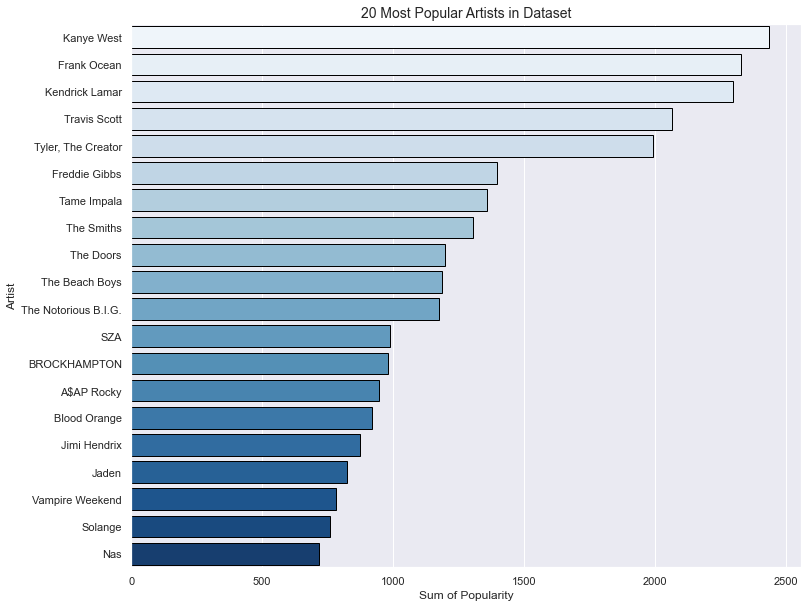

In [75]:
# # Plotting
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', fontsize=14)
plt.show()

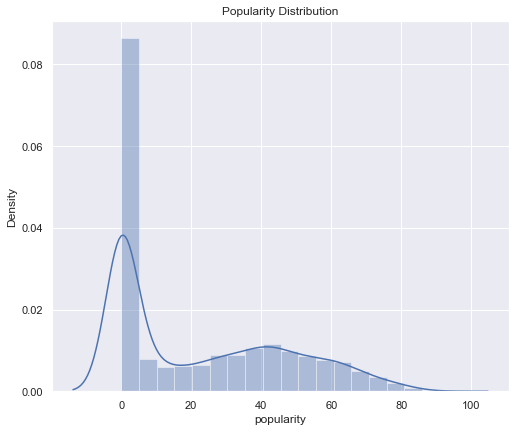

In [76]:
num_cols = ['popularity']
plt.figure(figsize= [18, 15])
for n, col in enumerate(num_cols):
    plt.subplot(2, 2, n + 1)
    sns.distplot(df[col]).set_title('Popularity Distribution')

In [77]:
#as we see on the graph max. denisty rises after 50, thus making popularity into binary value
df.loc[df['popularity'] < 50, 'popularity'] = 0 
df.loc[df['popularity'] >= 50, 'popularity'] = 1
df.loc[df['popularity'] == 1]
df.head()

,track_name,track_id,artist_name,artist_id,album_name,release_date,genres,genres_id,length,popularity,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,Miss The Days,1,SBTRKT,1,Miss The Days,2022,"['alternative dance', 'electronica', 'electrop...",1,220650,0,...,0.522,0.934,0.517000,1,0.0447,-3.334,0,0.0631,175.293,4
1,Turning You On,2,Never Dull,2,"VA Compilation, Vol. 2",2018,"['disco house', 'funky house']",2,405245,0,...,0.794,0.784,0.713000,4,0.0892,-8.079,0,0.0802,120.014,4
2,Otis,3,JAY-Z,3,Watch The Throne (Deluxe),2011,"['east coast hip hop', 'hip hop', 'rap']",3,178213,1,...,0.754,0.631,0.000000,7,0.5000,-4.751,0,0.3070,94.577,4
3,Matilda,4,Harry Styles,4,Harry's House,2022,['pop'],4,245964,1,...,0.507,0.294,0.000020,2,0.0966,-10.000,1,0.0400,114.199,4
4,Quarterback,5,Wallows,5,Quarterback,2021,"['indie pop', 'modern rock', 'pop']",5,180386,1,...,0.689,0.719,0.000002,11,0.1070,-3.883,1,0.0310,121.008,4


In [78]:
#checking for duplicate value
boolean = df['track_name'].duplicated().any() 
boolean #As boolean is true there is duplicate values

True

In [79]:
df['popularity'].unique()

array([0, 1], dtype=int64)

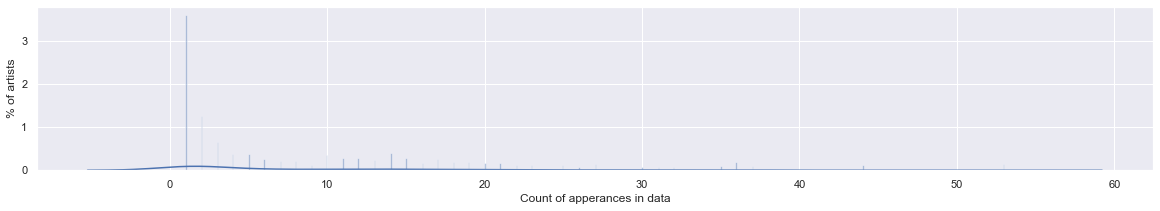

In [80]:
df['mean'] = df.groupby('artist_name')['popularity'].transform('mean')
df['count'] = df.groupby('artist_name')['popularity'].transform('count')
# plotting
fig, ax = plt.subplots(figsize = (20, 3))
ax = sns.distplot(df['count'], bins = 600)
ax.set_xlabel('Count of apperances in data', fontsize=12,)
ax.set_ylabel('% of artists', fontsize=12)
plt.show()

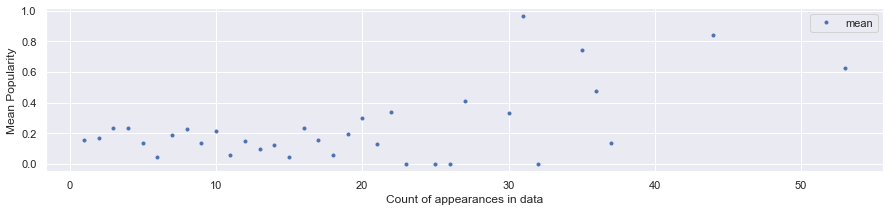

In [81]:
fig, ax = plt.subplots(figsize = (15, 3))
stat = df.groupby('count')['mean'].mean().to_frame().reset_index()
ax = stat.plot(x='count', y='mean', marker='.', linestyle = '', ax=ax)
ax.set_xlabel('Count of appearances in data', fontsize=12)
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.show()

#### Content-based filtering

##### Model 1: Naive Bayes

In [82]:
from sklearn.model_selection import train_test_split
X_NB = df.drop(['popularity','track_name','track_id','artist_name','artist_id', 'album_name','genres', 'genres_id', 'count'], axis=1).to_numpy()
y_NB = df['popularity'].copy()

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB, y_NB, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler

#Standardize
scaler = StandardScaler()
scaler.fit(X_train_NB)
    
X_train_NB = scaler.transform(X_train_NB)
X_test_NB = scaler.transform(X_test_NB)

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score

NB = GaussianNB()
NB.fit(X_train_NB, y_train_NB)
NB_predict = NB.predict(X_test_NB)

from sklearn import metrics
NB_acc = accuracy_score(y_test_NB, NB_predict)
print('NB_accuracy: ', NB_acc)

NB_AUC = roc_auc_score(y_test_NB, NB_predict) 
print("AUC: " + str(NB_AUC))

NB_accuracy:  0.9256292906178489
AUC: 0.9024485543110186


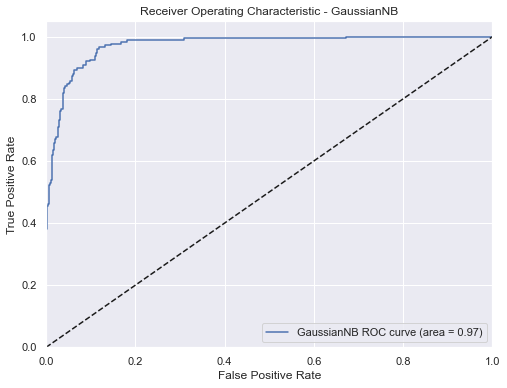

In [85]:
from sklearn.metrics import roc_curve, auc

y_score = NB.predict_proba(X_test_NB)[:, 1]

fpr, tpr, _ = roc_curve(y_test_NB, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='GaussianNB ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - GaussianNB')
plt.legend(loc="lower right")
plt.show()

#### Model 2: Stochastic Gradient Descent (SGD)

In [86]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd = SGDClassifier()
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
cv = GridSearchCV(sgd, param_grid, n_jobs=-1,verbose =1)
result = cv.fit(X_train_NB, y_train_NB)

print('\noptimal learning rate = {}'.format(result.best_params_))

sgd_model = result.best_estimator_


sgd_predict = sgd_model.predict(X_test_NB)
sgd_acc = accuracy_score(y_test_NB, sgd_predict)
print('\nAccuracy: {}'.format(sgd_acc))

SGD_AUC = roc_auc_score(y_test_NB, sgd_predict) 
print("AUC: " + str(SGD_AUC))

Fitting 5 folds for each of 7 candidates, totalling 35 fits

optimal learning rate = {'alpha': 0.1}

Accuracy: 0.9244851258581236
AUC: 0.8571161109663974


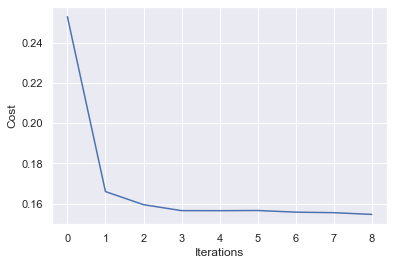

In [87]:
import sys
from io import StringIO
import io

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

sgd = SGDClassifier(max_iter=1000,alpha=0.01,verbose=2)

sgd.fit(X_train_NB, y_train_NB)

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []

for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
    
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

#### Model 3 : Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train_NB, y_train_NB)
DT_Predict = DT_Model.predict(X_test_NB)
DT_Accuracy = accuracy_score(y_test_NB, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_test_NB, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.8958810068649885
AUC: 0.8285849179473821


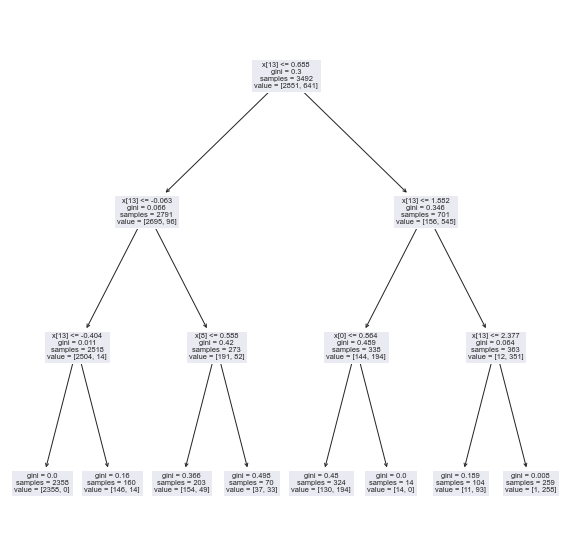

In [89]:
from sklearn.tree import plot_tree
# Create a decision tree classifier with max_depth=3
DT = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the data
DT.fit(X_train_NB, y_train_NB)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(DT, ax=ax)
plt.show()

#### Model 4 : Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_NB, y_train_NB)
RandomForest_Predict = RandomForest.predict(X_test_NB)
RandomForest_Accuracy = accuracy_score(y_test_NB, RandomForest_Predict)
print("Accuracy: " + str(RandomForest_Accuracy))

RF_AUC = roc_auc_score(y_test_NB, RandomForest_Predict) 
print("AUC: " + str(RF_AUC))

Accuracy: 0.9267734553775744
AUC: 0.8691716592862725


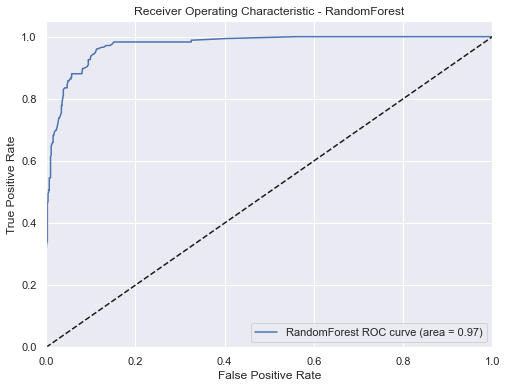

In [91]:
from sklearn.metrics import roc_curve, auc

y_score = RandomForest.predict_proba(X_test_NB)[:, 1]

fpr, tpr, _ = roc_curve(y_test_NB, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='RandomForest ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RandomForest')
plt.legend(loc="lower right")
plt.show()

#### Model 5 : K Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train_NB, y_train_NB)
KNN_Predict = KNN_Model.predict(X_test_NB)
KNN_Accuracy = accuracy_score(y_test_NB, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_test_NB, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.914187643020595
AUC: 0.8315479291482157


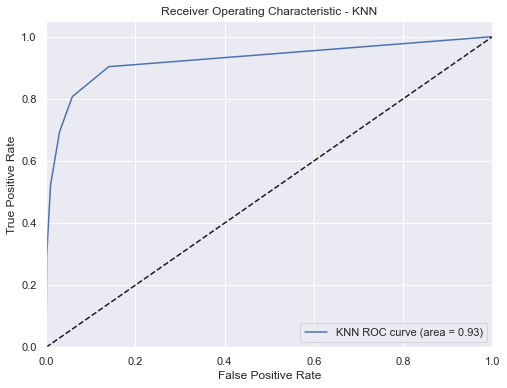

In [93]:
from sklearn.metrics import roc_curve, auc

y_score = KNN_Model.predict_proba(X_test_NB)[:, 1]

fpr, tpr, _ = roc_curve(y_test_NB, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='KNN ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

#### Model 5 : XGBoost

In [94]:
from xgboost import XGBClassifier

XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train_NB, y_train_NB)
XGB_Predict = XGB_Model.predict(X_test_NB)
XGB_Accuracy = accuracy_score(y_test_NB, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_test_NB, XGB_Predict) 
print("AUC: " + str(XGB_AUC))

Accuracy: 0.9244851258581236
AUC: 0.8613652643917687


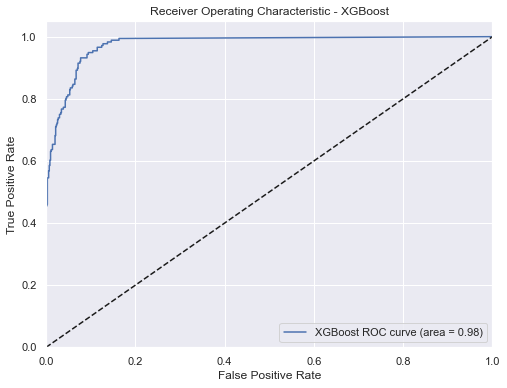

In [95]:
from sklearn.metrics import roc_curve, auc

y_score = XGB_Model.predict_proba(X_test_NB)[:, 1]

fpr, tpr, _ = roc_curve(y_test_NB, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

#### Result

#### Popularity Based recommendation

#### Using Cosine Similarity to get the similarity between popular songs

In [96]:
data_new = df.drop(['track_name','track_id','artist_name','artist_id', 'album_name','genres', 'genres_id', 'count'], axis=1)
train, test = train_test_split(data_new, test_size=0.2, random_state=42)

test = test.drop(['popularity'], axis=1).to_numpy()

liked_songs = train.loc[train['popularity'] == 1].drop(['popularity'], axis=1)
disliked_songs = train.loc[train['popularity'] == 0].drop(['popularity'], axis=1)

liked_songs_id = liked_songs.index
disliked_songs_id = disliked_songs.index

def normalize_2(arr):
    cols_mean, cols_stdev = arr.mean(axis=0), arr.std(axis=0)
    output = (arr - cols_mean) / cols_stdev
    return output

def get_track_features(idx_arr):
    track_features = []
    for idx in idx_arr:
        if idx in liked_songs_id:
            track = normalize_2(liked_songs.loc[idx].to_numpy())
        elif idx in disliked_songs_id:
            track = normalize_2(disliked_songs.loc[idx].to_numpy())
        
        if len(track) > 0:
            track_features.append(track)
    return np.array(track_features)

user_favorites = get_track_features(liked_songs_id)
user_dislikes = get_track_features(disliked_songs_id)

print('no. of popular songs: {0}\nno. of unpopular: {1}\n'.format(len(user_favorites), len(user_dislikes)))

from numpy import linalg as LA

fav_mean = user_favorites.mean(axis=0)

def top_5(tracks):
    cosine_similarities = [np.dot(fav_mean, sample)/(LA.norm(fav_mean)*LA.norm(sample)) for sample in tracks]
    zipped_similarities = zip(cosine_similarities, enumerate(tracks))
    sorted_similarities = sorted(zipped_similarities, reverse=True, key = lambda x: x[0])
    
    return [(idx,_similarity) for _similarity,(idx,_features) in sorted_similarities[0:5]]
        
print('Top 5 new tracks for user with their similatirity to popular songs : \n{}'.format(top_5(test)))

no. of popular songs: 641
no. of unpopular: 2851

Top 5 new tracks for user with their similatirity to popular songs : 
[(363, 0.9635230387231171), (122, 0.963472153348027), (771, 0.9634721158657386), (416, 0.9634462635459959), (213, 0.9633947884746719)]


#### Recommending top 5 popular songs from new unseen data based on the similarity of these tracks to the existing popular tracks.

In [97]:
top_5_songs = top_5(test)
c=1
print('Top 5 new tracks for users with their similatirity to popular songs : \n')
for song in top_5_songs:
    id = song[0]
    print('{0}. {1}\n'.format(c, df.loc[df.index[id]]['track_name']))
    c = c+1

Top 5 new tracks for users with their similatirity to popular songs : 

1. Sunny

2. Heartless

3. Riot!

4. Sister

5. Friendly Pressure - Into The Sunshine Edit



### Result 

#### All model comparison

In [98]:
model_performance_accuracy = pd.DataFrame({'Model': ['RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier',
                                                      'XGBClassifier','NaiveBayes','SGDClassifier'],
                                            'Accuracy': [RandomForest_Accuracy, KNN_Accuracy,DT_Accuracy,
                                                         XGB_Accuracy,NB_acc,sgd_acc],
                                      
                                             'F1_Score': [f1_score(y_test_NB, RandomForest_Predict),
                                                         f1_score(y_test_NB, KNN_Predict),
                                                           f1_score(y_test_NB, DT_Predict),
                                                            f1_score(y_test_NB, XGB_Predict),
                                                            f1_score(y_test_NB, NB_predict),
                                                            f1_score(y_test_NB, sgd_predict) ] })

In [99]:
model_performance_accuracy.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,F1_Score
0,RandomForestClassifier,0.926773,0.809524
4,NaiveBayes,0.925629,0.823848
3,XGBClassifier,0.924485,0.801205
5,SGDClassifier,0.924485,0.798780
1,KNeighborsClassifier,0.914188,0.764890
2,DecisionTreeClassifier,0.895881,0.734694


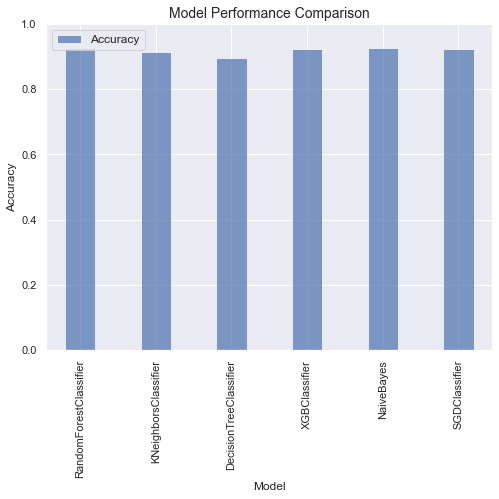

In [100]:
# Create a bar chart of model performance
fig, ax = plt.subplots(figsize=(8,6))
model_performance_accuracy.plot(kind='bar', x='Model', y='Accuracy', 
                                ax=ax, color='b', alpha=0.7, legend=False, width=0.4)

# Add labels and titles
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.legend(['Accuracy'], fontsize=12)
ax.set_ylim([0,1])

plt.show()

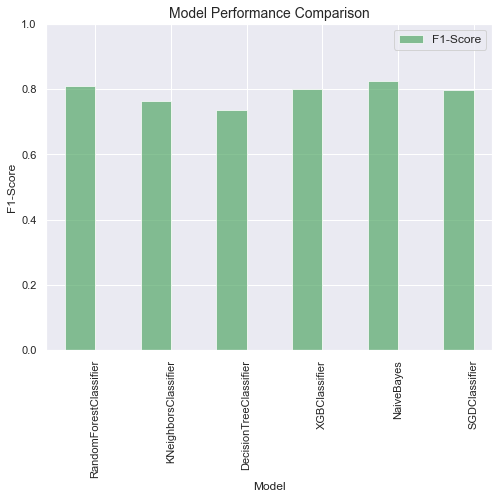

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
model_performance_accuracy.plot(kind='bar', x='Model', y='F1_Score', 
                                ax=ax, color='g', alpha=0.7, legend=False, width=0.4, position=1)

# Add labels and titles
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.legend(['F1-Score'], fontsize=12)
ax.set_ylim([0,1])

plt.show()